# **Map Generation**


In [1]:
pip install netgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.7/96.7 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 339.3/339.3 kB 9.0 MB/s eta 0:00:00


In [5]:
pip install folium matplotlib mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.7/286.7 kB 14.3 MB/s eta 0:00:00


In [4]:
pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.5/100.5 kB 7.3 MB/s eta 0:00:00


In [12]:
pip install geopandas

In [13]:
pip install geoplot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 103.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 79.7 MB/s eta 0:00:00


In [21]:
pip install ipyleaflet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.8 MB/s eta 0:00:00


In [23]:
import re
import pandas as pd
import numpy as np
import bs4
import requests
import spacy
from spacy import displacy
from spacy.matcher import Matcher
from spacy.tokens import Span
import networkx as nx
import itertools
import matplotlib.pyplot as plt
from IPython import display
import networkx.algorithms.approximation as nx_app
import math
from tqdm import tqdm
pd.set_option('display.max_colwidth', 200)
%matplotlib inline
from netgraph import Graph
from matplotlib.animation import FuncAnimation
from IPython import display
import osmnx as ox
import geopandas as gpd
from shapely.geometry import Point, LineString
import geoplot
import ipyleaflet
from ipyleaflet import Map, Marker

**1. ipyleaflet - Map generation**

In [38]:
center = (47.5461, 9.6818)

m = Map(center=center, zoom=11)

marker = Marker(location=center, draggable=True)
m.add(marker);

m

Map(center=[47.5461, 9.6818], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

**2. geopandas - Map generation - Bodensee**

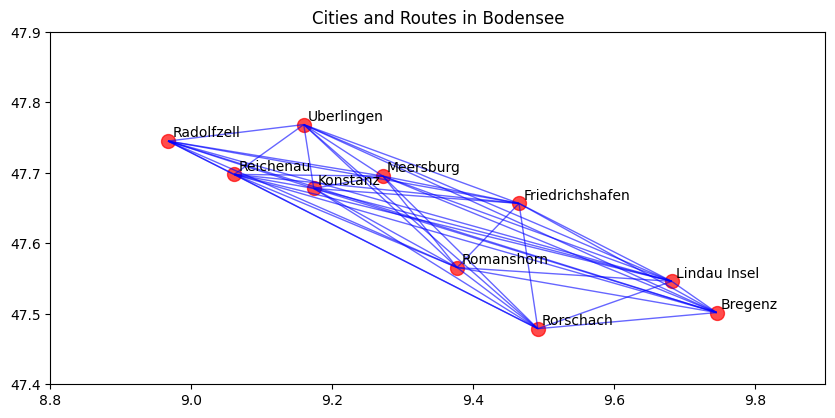

In [46]:
# Set the number of nodes (cities)
num_nodes = 10

# Define the city data
city_data = {
    'city': ['Lindau Insel', 'Bregenz', 'Romanshorn', 'Rorschach', 'Friedrichshafen', 'Konstanz', 'Meersburg', 'Radolfzell', 'Uberlingen', 'Reichenau'],
    'lat': [47.5461, 47.5018, 47.5657, 47.4789, 47.6567,47.6780,47.6955,47.7452, 47.7686, 47.6979 ],
    'lng': [9.6818, 9.7454, 9.3772, 9.4917, 9.4650,9.1737,9.2718, 8.9669, 9.1595,9.0608  ]
}



# Create a complete graph with num_nodes nodes
G = nx.complete_graph(num_nodes)

# Add nodes to the graph with city names as labels
for i in range(num_nodes):
    G.nodes[i]['city'] = city_data['city'][i]

# Create a GeoDataFrame for the cities with Point geometries
gdf_cities = gpd.GeoDataFrame(city_data, geometry=gpd.points_from_xy(city_data['lng'], city_data['lat']))

# Create a GeoDataFrame for the routes (edges)
routes = []
for edge in G.edges():
    city1 = G.nodes[edge[0]]['city']
    city2 = G.nodes[edge[1]]['city']
    route = LineString([(gdf_cities[gdf_cities['city'] == city1].geometry.x.iloc[0], gdf_cities[gdf_cities['city'] == city1].geometry.y.iloc[0]),
                        (gdf_cities[gdf_cities['city'] == city2].geometry.x.iloc[0], gdf_cities[gdf_cities['city'] == city2].geometry.y.iloc[0])])
    routes.append(route)

gdf_routes = gpd.GeoDataFrame(geometry=routes)

# Create a plot for the map of France
fig, ax = plt.subplots(figsize=(10, 8))
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#france_shapefile = m
#france_shapefile.boundary.plot(ax=ax, color='lightgray', linewidth=0.8)
gdf_cities.plot(ax=ax, marker='o', color='red', markersize=100, alpha=0.7)
gdf_routes.plot(ax=ax, color='blue', linewidth=1, alpha=0.6)

# Add labels for the cities
for x, y, label in zip(gdf_cities.geometry.x, gdf_cities.geometry.y, gdf_cities['city']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", color='black', fontsize=10)

# Set the axis limits to focus on France
ax.set_xlim(8.8, 9.9)
ax.set_ylim(47.4, 47.9)

# Show the plot
plt.title('Cities and Routes in Bodensee')
plt.show()

**3. geopandas - Map generation - France**

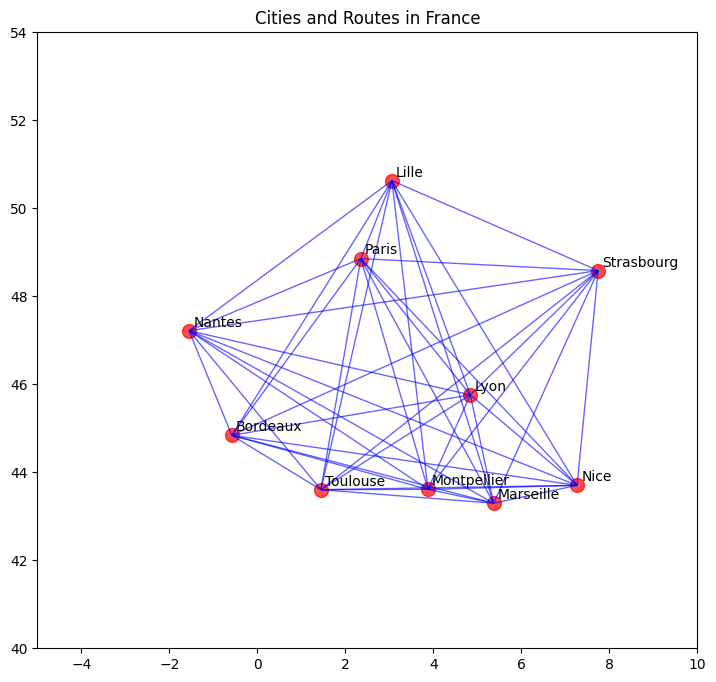

In [47]:
# Set the number of nodes (cities)
num_nodes = 10

# Define the city data
city_data = {
    'city': ['Paris', 'Marseille', 'Lyon', 'Toulouse', 'Nice', 'Nantes', 'Montpellier', 'Strasbourg', 'Bordeaux', 'Lille'],
    'lat': [48.8567, 43.2964, 45.7600, 43.6045, 43.7034, 47.2181, 43.6119, 48.5833, 44.8400, 50.6278],
    'lng': [2.3522, 5.3700, 4.8400, 1.4440, 7.2663, -1.5528, 3.8772, 7.7458, -0.5800, 3.0583]
}

# Create a complete graph with num_nodes nodes
G = nx.complete_graph(num_nodes)

# Add nodes to the graph with city names as labels
for i in range(num_nodes):
    G.nodes[i]['city'] = city_data['city'][i]

# Create a GeoDataFrame for the cities with Point geometries
gdf_cities = gpd.GeoDataFrame(city_data, geometry=gpd.points_from_xy(city_data['lng'], city_data['lat']))

# Create a GeoDataFrame for the routes (edges)
routes = []
for edge in G.edges():
    city1 = G.nodes[edge[0]]['city']
    city2 = G.nodes[edge[1]]['city']
    route = LineString([(gdf_cities[gdf_cities['city'] == city1].geometry.x.iloc[0], gdf_cities[gdf_cities['city'] == city1].geometry.y.iloc[0]),
                        (gdf_cities[gdf_cities['city'] == city2].geometry.x.iloc[0], gdf_cities[gdf_cities['city'] == city2].geometry.y.iloc[0])])
    routes.append(route)

gdf_routes = gpd.GeoDataFrame(geometry=routes)

# Create a plot for the map of France
fig, ax = plt.subplots(figsize=(10, 8))
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#france_shapefile = m
#france_shapefile.boundary.plot(ax=ax, color='lightgray', linewidth=0.8)
gdf_cities.plot(ax=ax, marker='o', color='red', markersize=100, alpha=0.7)
gdf_routes.plot(ax=ax, color='blue', linewidth=1, alpha=0.6)

# Add labels for the cities
for x, y, label in zip(gdf_cities.geometry.x, gdf_cities.geometry.y, gdf_cities['city']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", color='black', fontsize=10)

# Set the axis limits to focus on France
ax.set_xlim(-5, 10)
ax.set_ylim(40, 54)

# Show the plot
plt.title('Cities and Routes in France')
plt.show()

https://gadm.org/download_country.html#google_vignette


https://bechirtr97.medium.com/solving-optimal-shipment-route-problem-using-christofides-serdyukov-algorithm-simplex-and-a788f5e89d18




